<a href="https://colab.research.google.com/github/nramelia2/MACHINE-LEARNING/blob/main/WEEK%2011_LeNet/LeNet_5_CNN_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam 
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
df_train = pd.read_csv('/content/drive/MyDrive/ML/week11/train.csv')
X_train = df_train.iloc[:, 1:]
Y_train = df_train.iloc[:, 0]

In [30]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
Y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [32]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [33]:
# Normalize inputs
X_train = X_train / 255.0

###### Plot Digits

In [35]:
def plot_digits(X, Y):
    for i in range(20):
        plt.subplot(5, 4, i+1)
        plt.tight_layout()
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title('Digit:{}'.format(Y[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()

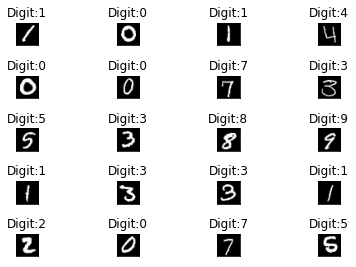

In [36]:
plot_digits(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


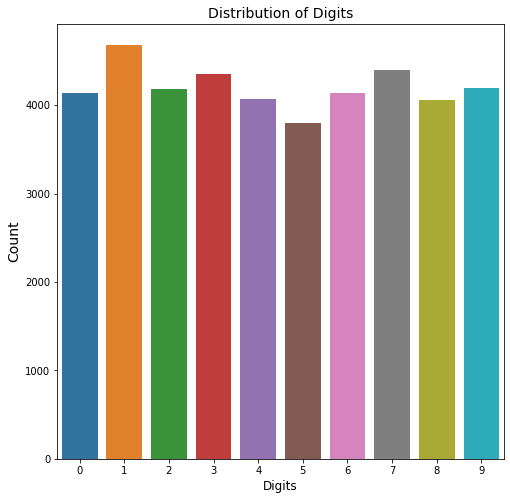

In [38]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(Y_train)
ax.set_title('Distribution of Digits', fontsize=14)
ax.set_xlabel('Digits', fontsize=12)
ax.set_ylabel('Count', fontsize=14)
plt.show()

In [39]:
#Train-Test Split
X_dev, X_val, Y_dev, Y_val = train_test_split(X_train, Y_train, test_size=0.03, shuffle=True, random_state=2019)
T_dev = pd.get_dummies(Y_dev).values
T_val = pd.get_dummies(Y_val).values

In [40]:
#Reshape the input 
X_dev = X_dev.reshape(X_dev.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)

CNN Architecture
We will LeNet-5 CNN architeture to build our model.

LeNet - 5 Architecture:

LeNet-5 Architecture

Convolution Operation:
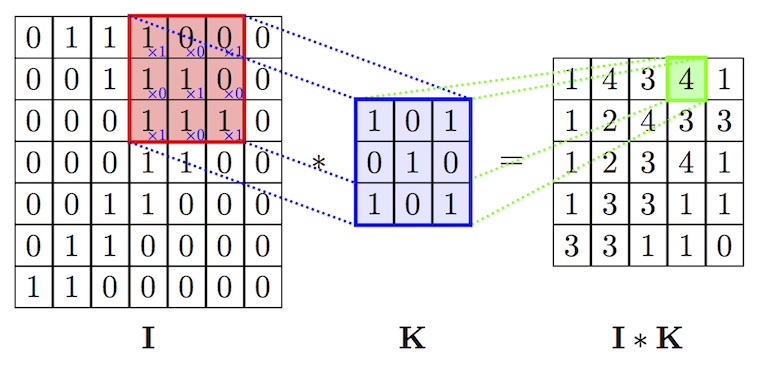

Input : Flattened 784px grayscale images, which can be represented as dimension (n, 28, 28, 1)
Output: 0 - 9
Let's decode the operations we will be performing in each layer
First Layer: Convolutional Layer (CONV1):

Parameters: Input (N) = 28, Padding (P) = 2, Filter (F) = 5 x 5, Stride (S) = 1
Conv Operation: ((N + 2P - F) / S) + 1 = ((28 + 4 - 5) / 1) + 1 = 28 x 28
We will apply 6 filters / kernels so we will get a 28 x 28 x 6 dimensional output
Second Layer: Average Pooling Layer (POOL1):

Parameters: Input (N) = 28, Filter (F) = 2 x 2, Stride (S) = 2
AVG Pooling Operation: ((N + 2P -F) / S) + 1 = ((28 - 2) / 2) + 1 = 14 x 14
We will have a 14 x 14 x 6 dimensional output at the end of this pooling
Third Layer: Convolutional Layer (CONV2):

Parameters: Input (N) = 14, Filter (F) = 5 x 5, Stride (S) = 1
Conv Operation: ((N + 2P - F) / S) + 1 = ((14 - 5) / 1) + 1 = 10 x 10
We will apply 16 filters / kernels so we will get a 10 x 10 x 16 dimensional output
Fourth Layer: Average Pooling Layer (POOL2):

Parameters: Input (N) = 10, Filter (F) = 2 x 2, Stride (S) = 2
AVG Pooling Operation: ((N + 2P -F) / S) + 1 = ((10 - 2) / 2) + 1 = 5 x 5
We will have a 5 x 5 x 16 dimensional output at the end of this pooling

Fifth Layer: Fully Connected layer(FC1):

Parameters: W: 400 * 120, b: 120
We will have an output of 120 x 1 dimension
Sixth Layer: Fully Connected layer(FC2):

Parameters: W: 120 * 84, b: 84
We will have an output of 84 x 1 dimension
Seventh Layer: Output layer(Softmax):

Parameters: W: 84 * 10, b: 10
We will get an output of 10 x 1 dimension
We will tweak the pooling layers from average to max and activation functions. With this architecture as per book, I was not able to achieve accuracy > 98.5%. Let's imcrease the filters and check.

In [41]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(strides=2))
model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPool2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [42]:
model.build()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 48)        38448     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1200)              0         
                                                                 
 dense_3 (Dense)             (None, 256)              

In [49]:
adam = Adam(lr=5e-4)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [50]:
# Set a learning rate annealer
reduce_lr = ReduceLROnPlateau(monitor='val_acc', 
                                patience=3, 
                                verbose=1, 
                                factor=0.2, 
                                min_lr=1e-6)

In [51]:
# Data Augmentation
datagen = ImageDataGenerator(
            rotation_range=10, 
            width_shift_range=0.1, 
            height_shift_range=0.1, 
            zoom_range=0.1)
datagen.fit(X_dev)

In [52]:
model.fit_generator(datagen.flow(X_dev, T_dev, batch_size=100), steps_per_epoch=len(X_dev)/100, 
                    epochs=30, validation_data=(X_val, T_val), callbacks=[reduce_lr])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
407/407 [==============================] - 71s 172ms/step - loss: 0.5044 - accuracy: 0.8393 - val_loss: 0.1006 - val_accuracy: 0.9675 - lr: 5.0000e-04
Epoch 2/30
407/407 [==============================] - 69s 170ms/step - loss: 0.1416 - accuracy: 0.9576 - val_loss: 0.0626 - val_accuracy: 0.9778 - lr: 5.0000e-04
Epoch 3/30
407/407 [==============================] - 69s 168ms/step - loss: 0.1014 - accuracy: 0.9688 - val_loss: 0.0557 - val_accuracy: 0.9786 - lr: 5.0000e-04
Epoch 4/30
407/407 [==============================] - 70s 171ms/step - loss: 0.0826 - accuracy: 0.9751 - val_loss: 0.0442 - val_accuracy: 0.9889 - lr: 5.0000e-04
Epoch 5/30
407/407 [==============================] - 71s 174ms/step - loss: 0.0671 - accuracy: 0.9781 - val_loss: 0.0416 - val_accuracy: 0.9889 - lr: 5.0000e-04
Epoch 6/30
407/407 [==============================] - 70s 172ms/step - loss: 0.0579 - accuracy: 0.9820 - val_loss: 0.0488 - val_accuracy: 0.9897 - lr: 5.0000e-04
Epoch 7/30
407/407 [========

In [53]:
score = model.evaluate(X_val, T_val, batch_size=32)

40/40 [==============================] - 1s 14ms/step - loss: 0.0161 - accuracy: 0.9952


In [54]:
score

[0.016072677448391914, 0.9952380657196045]

###### Let's predict test data

In [56]:
df_test = pd.read_csv('/content/drive/MyDrive/ML/week11/test.csv')
X_test = np.array(df_test)
X_test = X_test/255.0

In [57]:
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
Y_test = model.predict(X_test)

In [58]:
Y_test = np.argmax(Y_test, axis=1)
Y_test[:5]

array([2, 0, 9, 0, 3])

###### Creat Submission File

In [59]:
df_out = pd.read_csv('/content/drive/MyDrive/ML/week11/sample_submission.csv')
df_out['Label'] = Y_test
df_out.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


###### Reference : https://www.kaggle.com/code/curiousprogrammer/lenet-5-cnn-with-keras-99-48/notebook